<a href="https://colab.research.google.com/github/jerrymart/Machine-Learning-Projects/blob/main/Final_Project_3_Lasso_Ridge_LogisticsRge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Team Members:

##### Joseph Mart A00732897

##### Samuel Aremora A00764591



### 1. Introduction.  Why is what you’re doing important?  Who is interested?  Where did your dataset come from? :

### Response

Breast cancer is a disease in which cells in the breast grow out of control. There are different kinds of breast cancer. The kind of breast cancer depends on which cells in the breast turn into cancer.

Breast cancer can begin in different parts of the breast. A breast is made up of three main parts: lobules, ducts, and connective tissue. The lobules are the glands that produce milk. The ducts are tubes that carry milk to the nipple. The connective tissue (which consists of fibrous and fatty tissue) surrounds and holds everything together. Most breast cancers begin in the ducts or lobules.

Breast cancer can spread outside the breast through blood vessels and lymph vessels. When breast cancer spreads to other parts of the body, it is said to have metastasized.

It accounts for 25% of all cancer cases, and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.

The key challenges against it’s detection is how to classify tumors into malignant M (cancerous) or benign B(non cancerous). We ask you to complete the analysis of classifying these tumors using predictive modelling tecniques  and the Breast Cancer Wisconsin (Diagnostic) Dataset. gotten from kaggle https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset/download



### Objectives

Build classification models to predict whether the cancer type is Malignant or Benign based off several features exhibited during the cancer building stages

Also we fine-tune the hyperparameters & compare the evaluation metrics of best classification algorithm.

###Import Libraries

In [ ]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


#Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

#evaluation metrics
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score,confusion_matrix
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.model_selection import cross_validate, cross_val_score


%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Read Data and Make It a Data Frame.

In [ ]:
df = pd.read_csv('/content/breast-cancer.csv') 

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


# Prepare and Exploring the data 

Inspecting the variable types, missing values, outlying and possibly
wrong records, and other issues. 
We will Perform some EDA (Exploratory Data Analysis) including frequency distribution of the target variable and see whether we have a very unbalanced classification problem. Also, we explore the associations between the response variable  and other attributes. 

In [ ]:
# Checking for null values

df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

There is no missiing data

In [ ]:
#Dimension of the data
df.shape

(569, 32)

In [ ]:
# Investigate all the elements whithin each Feature 

for column in df:
    unique_values = np.unique(df[column])
    nr_values = len(unique_values)
    if nr_values <= 5:
        print("The number of unique values for feature {} is: {} -- {}".format(column, nr_values, unique_values))
    else:
        print("The number of uniques values for feature {} is: {}".format(column, nr_values))

The number of uniques values for feature id is: 569
The number of unique values for feature diagnosis is: 2 -- [0 1]
The number of uniques values for feature radius_mean is: 456
The number of uniques values for feature texture_mean is: 479
The number of uniques values for feature perimeter_mean is: 522
The number of uniques values for feature area_mean is: 539
The number of uniques values for feature smoothness_mean is: 474
The number of uniques values for feature compactness_mean is: 537
The number of uniques values for feature concavity_mean is: 537
The number of uniques values for feature concave points_mean is: 542
The number of uniques values for feature symmetry_mean is: 432
The number of uniques values for feature fractal_dimension_mean is: 499
The number of uniques values for feature radius_se is: 540
The number of uniques values for feature texture_se is: 519
The number of uniques values for feature perimeter_se is: 533
The number of uniques values for feature area_se is: 528


All features are continuous except the response variable diagnosis

Transform the diagnosis M and B to Binary

In [ ]:
# Creating Scale Map
scale_mapper = {'M':1, 'B':0}

# Map feature values to scale
df['diagnosis'] = df['diagnosis'].replace(scale_mapper)

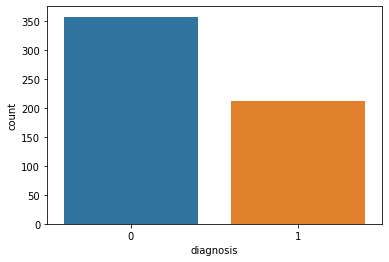

In [ ]:
#Response Balancesness :  frequency distribution

sns.countplot(data=df,x='diagnosis')

Less than 50 % of the response are Malignant

In [ ]:
#Recheck the data
df.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


### Investigating Multicolinearity

In [ ]:
dfcor = df.drop(columns=['diagnosis'])

In [ ]:
# Pairing Multicolinear Features

correlatedColumns = []
corr = dfcor.corr()
indices = corr.index
columns = corr.columns
posthreshold = 0.85
negthreshold = -0.85

for c in columns:
    for r in indices:
        if c != r and (corr[c][r] > posthreshold or corr[c][r] < negthreshold):
            correlatedColumns.append({"column" : c , "row" : r , "val" :corr[c][r] })
            
if len(correlatedColumns) < 1: print('No Multicolinearity found in dataset')

else: print(correlatedColumns)

[{'column': 'radius_mean', 'row': 'perimeter_mean', 'val': 0.9978552814938109}, {'column': 'radius_mean', 'row': 'area_mean', 'val': 0.9873571700566127}, {'column': 'radius_mean', 'row': 'radius_worst', 'val': 0.9695389726112055}, {'column': 'radius_mean', 'row': 'perimeter_worst', 'val': 0.9651365139559871}, {'column': 'radius_mean', 'row': 'area_worst', 'val': 0.9410824595860461}, {'column': 'texture_mean', 'row': 'texture_worst', 'val': 0.912044588840421}, {'column': 'perimeter_mean', 'row': 'radius_mean', 'val': 0.9978552814938109}, {'column': 'perimeter_mean', 'row': 'area_mean', 'val': 0.9865068039913907}, {'column': 'perimeter_mean', 'row': 'concave points_mean', 'val': 0.8509770412528191}, {'column': 'perimeter_mean', 'row': 'radius_worst', 'val': 0.9694763634663146}, {'column': 'perimeter_mean', 'row': 'perimeter_worst', 'val': 0.9703868870426394}, {'column': 'perimeter_mean', 'row': 'area_worst', 'val': 0.9415498080023068}, {'column': 'area_mean', 'row': 'radius_mean', 'val':

The result shows the features that are Multicolinear 
We have to remove them so our model don't fail later on

We will delete the features that are highly correlated from the dataset as and get a cleaner dataset for our use using this snippet of code

In [ ]:
# Get correlation matrix 
corr = df.corr()

# Create a mask for values above 90% 
# But also below 100% since it variables correlated with the same one
mask = (df.corr() > 0.85) & (df.corr() < 1.0)
high_corr = corr[mask]

# Create a new column mask using any() and ~
col_to_filter_out = ~high_corr[mask].any()

# Apply new mask
df_clean = df[high_corr.columns[col_to_filter_out]]

# Visualize cleaned dataset
df_clean.head(2)

,id,diagnosis,smoothness_mean,symmetry_mean,fractal_dimension_mean,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,0.11840,0.2419,0.07871,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,0.1622,0.4601,0.11890
1,842517,1,0.08474,0.1812,0.05667,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,0.1238,0.2750,0.08902


In [ ]:
len(df_clean.columns)

15

This gives the 14 features left from 49 initial features which will benefit our models
From now on, we will use the df_clean dataframe

#### Investigate the distribution of the response

In [ ]:
df_clean['diagnosis'].describe()

count    569.000000
mean       0.372583
std        0.483918
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: diagnosis, dtype: float64

#### Histogram Ditribution of the features

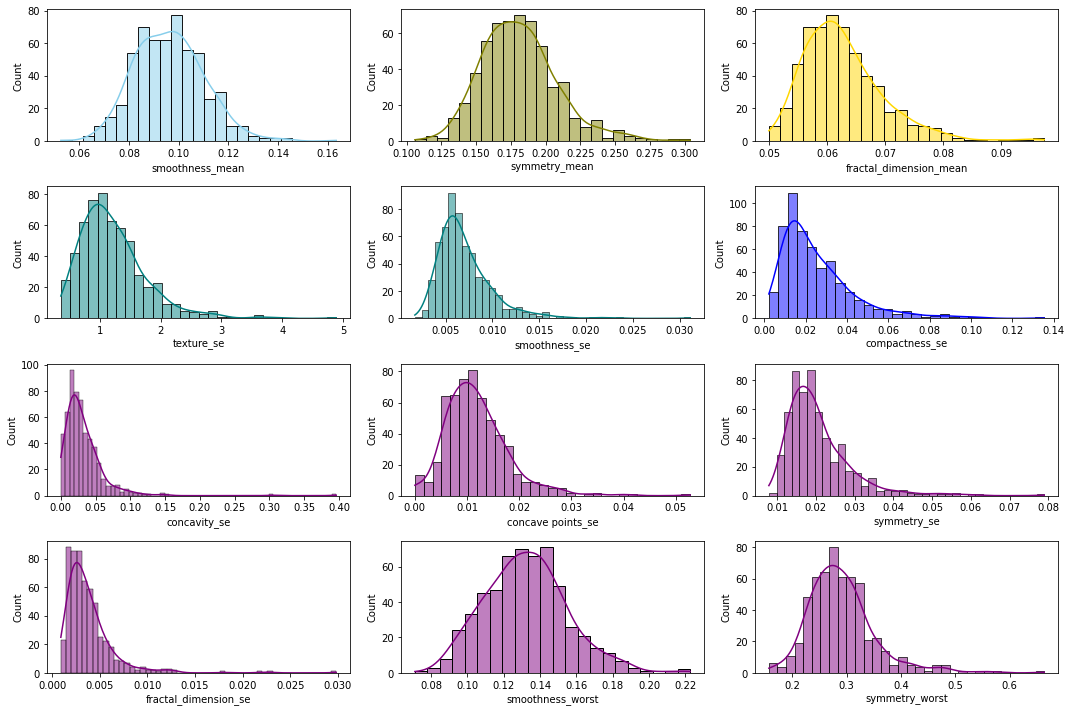

In [ ]:
### Histogram Ditribution of the features

fig,axs = plt.subplots(4,3, figsize = (15,10))

sns.histplot(data=df_clean, x="smoothness_mean",  color="skyblue", ax=axs[0, 0], kde=True)
sns.histplot(data=df_clean, x="symmetry_mean", color="olive", ax=axs[0, 1], kde=True)
sns.histplot(data=df_clean, x="fractal_dimension_mean", color="gold", ax=axs[0, 2], kde=True)

sns.histplot(data=df_clean, x="texture_se",color="teal", ax=axs[1, 0], kde=True)
sns.histplot(data=df_clean, x="smoothness_se",color="teal", ax=axs[1, 1], kde=True)
sns.histplot(data=df_clean, x="compactness_se", color="blue", ax=axs[1, 2], kde=True)

sns.histplot(data=df_clean, x="concavity_se", color="purple", ax=axs[2,0], kde=True)
sns.histplot(data=df_clean, x="concave points_se", color="purple", ax=axs[2,1], kde=True)
sns.histplot(data=df_clean, x="symmetry_se", color="purple", ax=axs[2,2], kde=True)

sns.histplot(data=df_clean, x="fractal_dimension_se", color="purple", ax=axs[3,0], kde=True)
sns.histplot(data=df_clean, x="smoothness_worst", color="purple", ax=axs[3,1], kde=True)
sns.histplot(data=df_clean, x="symmetry_worst", color="purple", ax=axs[3,2], kde=True)

fig.tight_layout()

The didtribution shown, we can tell that all the variable have normal distribution
This will benefit our model

### Effect of each feature on the response variable
The barplot showed the effect of each precitor on the response

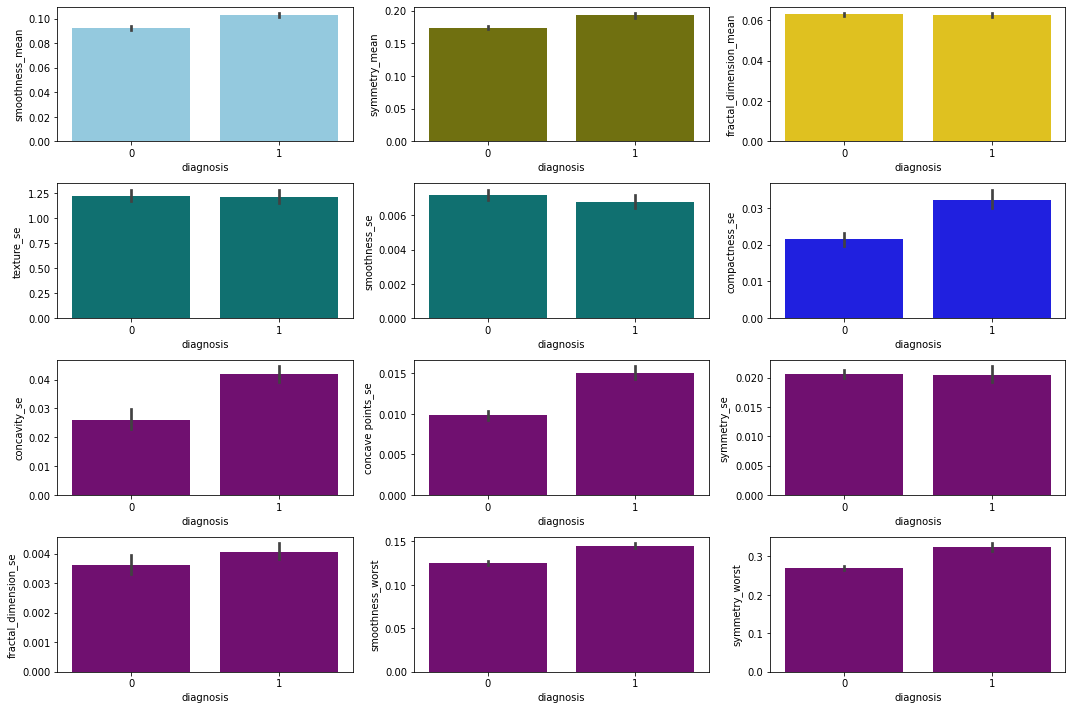

In [ ]:
# BarPlot Ditribution of the features

fig,axs = plt.subplots(4,3, figsize = (15,10))

sns.barplot(data=df_clean, x='diagnosis', y="smoothness_mean",  color="skyblue", ax=axs[0, 0])
sns.barplot(data=df_clean, x='diagnosis', y="symmetry_mean", color="olive", ax=axs[0, 1])
sns.barplot(data=df_clean, x='diagnosis', y="fractal_dimension_mean", color="gold", ax=axs[0, 2])

sns.barplot(data=df_clean, x='diagnosis', y="texture_se",color="teal", ax=axs[1, 0])
sns.barplot(data=df_clean, x='diagnosis', y="smoothness_se",color="teal", ax=axs[1, 1])
sns.barplot(data=df_clean, x='diagnosis', y="compactness_se", color="blue", ax=axs[1, 2])

sns.barplot(data=df_clean, x='diagnosis', y="concavity_se", color="purple", ax=axs[2,0])
sns.barplot(data=df_clean, x='diagnosis', y="concave points_se", color="purple", ax=axs[2,1])
sns.barplot(data=df_clean, x='diagnosis', y="symmetry_se", color="purple", ax=axs[2,2])

sns.barplot(data=df_clean, x='diagnosis', y="fractal_dimension_se", color="purple", ax=axs[3,0])
sns.barplot(data=df_clean, x='diagnosis', y="smoothness_worst", color="purple", ax=axs[3,1])
sns.barplot(data=df_clean, x='diagnosis', y="symmetry_worst", color="purple", ax=axs[3,2])

fig.tight_layout()

### Standardize The Data
We will standardize the data before spliting the data

In [ ]:
df_clean.columns

Index(['id', 'diagnosis', 'smoothness_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'texture_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'smoothness_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Scaling our columns except the target
scale_vars = ['id', 'smoothness_mean', 'symmetry_mean',
              'fractal_dimension_mean', 'texture_se', 'smoothness_se',
              'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
              'fractal_dimension_se', 'smoothness_worst', 'symmetry_worst',
              'fractal_dimension_worst'
             ]

scaler = MinMaxScaler()
df_clean[scale_vars] = scaler.fit_transform(df_clean[scale_vars]) #df[scale_vars] -> making the array  to a dataframe

df_clean.head()


,id,diagnosis,smoothness_mean,symmetry_mean,fractal_dimension_mean,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,symmetry_worst,fractal_dimension_worst
0,0.000915,1,0.593753,0.686364,0.605518,0.120469,0.159296,0.351398,0.135682,0.300625,0.311645,0.183042,0.601136,0.598462,0.418864
1,0.000915,1,0.289880,0.379798,0.141323,0.082589,0.119387,0.081323,0.046970,0.253836,0.084539,0.091110,0.347553,0.233590,0.222878
2,0.092495,1,0.514309,0.509596,0.211247,0.094303,0.150831,0.283955,0.096768,0.389847,0.205690,0.127006,0.483590,0.403706,0.213433
3,0.092547,1,0.811321,0.776263,1.000000,0.175875,0.251453,0.543215,0.142955,0.353665,0.728148,0.287205,0.915472,1.000000,0.773711
4,0.092559,1,0.430351,0.378283,0.186816,0.093065,0.332359,0.167918,0.143636,0.357075,0.136179,0.145800,0.437364,0.157500,0.142595


In [ ]:
#Predictors
X = df_clean.drop('diagnosis', axis = 1)

In [ ]:
#Response
y = df_clean['diagnosis']

In [ ]:
#Import the library for train_valid_test_split

!pip install fast_ml --upgrade

     |████████████████████████████████| 42 kB 668 kB/s 


#### Partition the data into three parts, the training data, the validation and the test data , with a ratio of 2:1:1.The validation data set will be used to test our Final model

In [ ]:
#Split the data into training and testing and validation set

from fast_ml.model_development import train_valid_test_split

X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df_clean, target = 'diagnosis', method='sorted', sort_by_col='id',
                                                                            train_size=0.8, valid_size=0.1, test_size=0.1)

print('X_train:', X_train.shape), print('y_train:', y_train.shape)
print('X_test:', X_test.shape), print('y_test:', y_test.shape)
print('X_valid:', X_valid.shape), print('y_valid:', y_valid.shape)


X_train: (455, 14)
y_train: (455,)
X_test: (58, 14)
y_test: (58,)
X_valid: (56, 14)
y_valid: (56,)


(None, None)

###2. How did you build your models and why?  What different kinds of approaches did you try?  Which did you ultimately abandon, and which did you find useful, and why?

####Response:
We will use 3-4 classification models and based off some metrics, we will choose the best among all the models and build on it by tuning the model to obtain best hyper-parameters. Then we will build the final model with the best parameter and validate/check its performance using the validation dataset that the models have not seen before

# Model 1:Logistics Regression 

In [ ]:
# Training my model

log_reg = LogisticRegression(random_state=10)

log_reg.fit(X_train, y_train)

LogisticRegression(random_state=10)

In [ ]:
#Predict with Test Data
y_pred_log_reg= log_reg.predict(X_test)

In [ ]:
#Check Model Accuracy 
MAE = mean_absolute_error(y_pred_log_reg, y_test)
print('Mean Absolute Error on Training Data is: ', (MAE)*100, '%')

Mean Absolute Error on Training Data is:  17.24137931034483 %


In [ ]:
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

<Figure size 432x288 with 0 Axes>

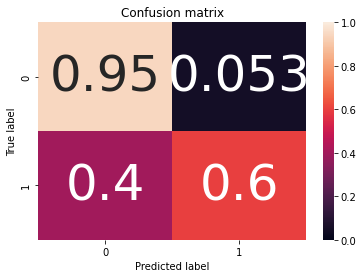

<Figure size 432x288 with 0 Axes>

In [ ]:
# Confusion Matrix output for Final Model

cm = confusion_matrix(y_test, y_pred_log_reg)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

plot_confusion_matrix(cm_norm, classes=log_reg.classes_)
plt.figure()

The model is biased towards the begin, not a good model

# Model 2: Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

#Train the model
lassoReg = Lasso(alpha=0.1)
lassoReg.fit(X_train, y_train)

Lasso(alpha=0.1)

In [ ]:
#Predict with Test Data
y_pred_lasso = lassoReg.predict(X_test)

In [ ]:
#Check Model Accuracy 
MAE = mean_absolute_error(y_pred_lasso, y_test)
print('Mean Absolute Error on Training Data is: ', (MAE)*100, '%')

Mean Absolute Error on Training Data is:  45.668813944676 %


# Model 3: Ridge Regression 

In [ ]:
from sklearn.linear_model import Ridge

#Train the model
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

Ridge(alpha=0.1)

In [ ]:
#Predict
y_pred_ridg = ridge.predict(X_test)

In [ ]:
#Check Model Accuracy 
MAE = mean_absolute_error(y_pred_ridg, y_test)
print('Mean Absolute Error on Training Data is: ', (MAE)*100, '%')

Mean Absolute Error on Training Data is:  28.123138215737132 %


# Model 4: Elastic Net

In [ ]:
# Define model
elasticNt = ElasticNet(alpha=0.1)

#Train the model
elasticNt.fit(X_train, y_train)

ElasticNet(alpha=0.1)

In [ ]:
#Predict
y_pred_elasticNt = elasticNt.predict(X_test)

In [ ]:
#Check Model Accuracy 
MAE = mean_absolute_error(y_pred_elasticNt, y_test)
print('Mean Absolute Error on Training Data is: ', (MAE)*100, '%')

Mean Absolute Error on Training Data is:  45.668813944676 %


### Observation
Logistics Regression seems to give the minimum MAE over Lasso, Ridge and ElasticNet without hyper-parameter tuning for thesame alpha value

Hence we will choose Logistic Regression as Final model since it is performing better and we will carry out Hyper-Parameter Tuning for the Logistic Regression to get the best C-parameter and then build our final model with that

#Hyper-Parameter Tuning To Obtain Best C-Parameter

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss

kf = StratifiedKFold(n_splits=3, random_state=0, shuffle=True)

#Range of C-Values
C_List = np.geomspace(1e-5, 1e5, num=100)

# Logistic Reg CV
Log_reg3 = LogisticRegressionCV(random_state=15, Cs = C_List, solver ='lbfgs')
Log_reg3.fit(X_train, y_train)
print("The Score Accuracy is:", Log_reg3.score(X_test, y_test))

#Log Loss and C Parameter
pred_proba_t = Log_reg3.predict_proba(X_test)
log_loss3 = log_loss(y_test, pred_proba_t)
print("The Logistic Loss is: ", log_loss3)
print("The optimal C parameter is: ", Log_reg3.C_)

The Score Accuracy is: 0.8620689655172413
The Logistic Loss is:  0.35027426454082644
The optimal C parameter is:  [73.90722034]


#Final Model
We will run our Final Model on the Validation Data with this C-parameter

In [ ]:
final_model = LogisticRegression(random_state=10,solver = 'lbfgs', C=73.90722034)

# Training my model
final_model.fit(X_train, y_train)

#Prediction
y_predfinal= final_model.predict(X_valid)

#Check Model Accuracy 
MAE = mean_absolute_error(y_predfinal, y_valid)
print('Mean Absolute Error on Training Data is: ', (MAE)*100, '%')

Mean Absolute Error on Training Data is:  12.5 %


<Figure size 432x288 with 0 Axes>

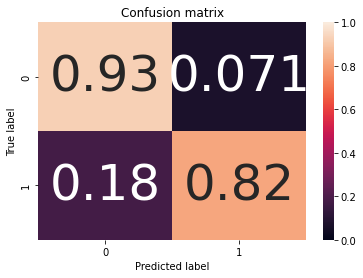

<Figure size 432x288 with 0 Axes>

In [ ]:
# Confusion Matrix output for Final Model

cm = confusion_matrix(y_valid, y_predfinal)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

plot_confusion_matrix(cm_norm, classes=final_model.classes_)
plt.figure()

#3. Conclusions, and any final discussion. 

After tuning the Logistic Regression model, we obtained the best C-parameter and we built the final model upon this

The MAE reduced to 12.5 form initial values 17.24

Also, accuracy of the final model shows a 93% True positive and 82% True Negative rate and show in the confusion matrix, the biasness has been removed

This model is good and can be used to predict for future Cancer events given thesame features

##### ROC CURVE

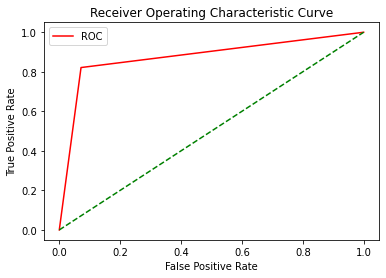

In [ ]:
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
    

from sklearn.metrics import roc_curve

fper, tper, thresholds = roc_curve(y_valid, y_predfinal)
plot_roc_curve(fper, tper)